## Importing required packages

In [2]:
from collections import Counter
from numpy import mean, std
import numpy as np
from pandas import read_csv
import pandas as pd
import seaborn as sns
import copy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from credit_data_actual_values import substitute

## Loading and displaying the data

In [3]:
#Load the data using pandas read_csv method
df=read_csv('german.data', sep=" ", header=None)
#Display the first few rows in the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


The data is encoded and not really human readable. Using the provided method to clean the data

In [42]:
df.shape

(1000, 21)

## Data Visualization

In [4]:
# Displaying data in human readable form with method substitute
# Make replica of the data for converting all the attribute values into human readable form
df_vis = copy.deepcopy(df)
# Call the method substitute from credit_data_actual_values.py to display the real world values
df_vis = substitute(df_vis)

In [5]:
df_vis.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,...,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,...,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [6]:
df_vis['Status of existing checking account'].value_counts()

no checking account    394
<0 DM                  274
0 <= <200 DM           269
>= 200 DM               63
Name: Status of existing checking account, dtype: int64

In [8]:
df_vis['Credit history'].value_counts()

existing credits paid back duly till now    530
critical account                            293
delay in paying off                          88
all credits at this bank paid back duly      49
no credits taken                             40
Name: Credit history, dtype: int64

In [9]:
df_vis['Purpose'].value_counts()

radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: Purpose, dtype: int64

In [10]:
df_vis['Savings account/bonds'].value_counts()

<100 DM               603
no savings account    183
100 <= <500 DM        103
500 <= < 1000 DM       63
>= 1000 DM             48
Name: Savings account/bonds, dtype: int64

In [11]:
df_vis['Present employment since'].value_counts()

1<= < 4 years    339
>=7 years        253
4<= <7 years     174
<1 years         172
unemployed        62
Name: Present employment since, dtype: int64

In [13]:
df_vis['Personal status and sex'].value_counts()

male:single                          548
female:divorced/separated/married    310
male:married/widowed                  92
male:divorced/separated               50
Name: Personal status and sex, dtype: int64

In [15]:
df_vis['Other debtors / guarantors'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: Other debtors / guarantors, dtype: int64

In [16]:
df_vis['Present residence since'].value_counts()

4    413
2    308
3    149
1    130
Name: Present residence since, dtype: int64

In [18]:
df_vis['Property'].value_counts()

car or other                        332
real estate                         282
savings agreement/life insurance    232
unknown / no property               154
Name: Property, dtype: int64

In [19]:
df_vis['Housing'].value_counts()

own         713
rent        179
for free    108
Name: Housing, dtype: int64

In [14]:
df_vis.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Cost Matrix(Risk)'],
      dtype='object')

In [29]:
categorical_columns = ['Status of existing checking account',
       'Credit history', 'Purpose', 'Savings account/bonds',
       'Present employment since',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property',
       'Other installment plans', 'Housing',
       'Job', 'Telephone',
       'foreign worker']

In [244]:
continous_columns = [col for col in df_vis if col not in categorical_columns + ['Cost Matrix(Risk)']]

In [245]:
data = pd.get_dummies(df_vis, columns=categorical_columns)

In [246]:
data.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Cost Matrix(Risk),Status of existing checking account_0 <= <200 DM,Status of existing checking account_<0 DM,Status of existing checking account_>= 200 DM,...,Housing_own,Housing_rent,Job_management/ highly qualified employee,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,Telephone_yes,foreign worker_no,foreign worker_yes
0,6,1169,4,67,2,1,Good Risk,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,22,1,1,Bad Risk,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,49,1,2,Good Risk,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,45,1,2,Good Risk,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,53,2,2,Bad Risk,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [247]:
data['Cost Matrix(Risk)'] = (data['Cost Matrix(Risk)'] == 'Good Risk').astype(int)

In [248]:
data.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Cost Matrix(Risk),Status of existing checking account_0 <= <200 DM,Status of existing checking account_<0 DM,Status of existing checking account_>= 200 DM,...,Housing_own,Housing_rent,Job_management/ highly qualified employee,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,Telephone_yes,foreign worker_no,foreign worker_yes
0,6,1169,4,67,2,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,22,1,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,49,1,2,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,45,1,2,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,53,2,2,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [249]:
data['Cost Matrix(Risk)'].mean()

0.7

In [250]:
# Indicates no missing values
data.dropna(how='any').shape

(1000, 65)

In [251]:
data.columns

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for',
       'Cost Matrix(Risk)', 'Status of existing checking account_0 <= <200 DM',
       'Status of existing checking account_<0 DM',
       'Status of existing checking account_>= 200 DM ',
       'Status of existing checking account_no checking account',
       'Credit history_all credits at this bank paid back duly',
       'Credit history_critical account', 'Credit history_delay in paying off',
       'Credit history_existing credits paid back duly till now',
       'Credit history_no credits taken', 'Purpose_business',
       'Purpose_car (new)', 'Purpose_car (used)',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_others',
       'Purpose_radio/television', 'Purpose_repairs', 'Purpose_retr

In [252]:
def clean_column_name(columns):
    cleaned = []
    for column in columns:
        cleaned.append(column.replace("<", "lt").replace(">", "gt").replace(",", " "))
    return cleaned

In [253]:
clean_columns = clean_column_name(data.columns)

In [254]:
clean_continous = clean_column_name(continous_columns)

In [255]:
data.columns = clean_columns

In [256]:
X = data[[x for x in data.columns if x != 'Cost Matrix(Risk)']]
y = data['Cost Matrix(Risk)']

## Scaling

In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_cont = X[continous_columns]
X_cont = sc.fit_transform(X_cont)
X[continous_columns] = X_cont

In [260]:
X.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account_0 lt= lt200 DM,Status of existing checking account_lt0 DM,Status of existing checking account_gt= 200 DM,Status of existing checking account_no checking account,...,Housing_own,Housing_rent,Job_management/ highly qualified employee,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident,Telephone_none,Telephone_yes,foreign worker_no,foreign worker_yes
0,-1.236478,-0.745131,0.918477,2.766456,1.027079,-0.428290,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,2.248194,0.949817,-0.870183,-1.191404,-0.704926,-0.428290,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,-0.738668,-0.416562,-0.870183,1.183312,-0.704926,2.334869,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,1.750384,1.634247,-0.870183,0.831502,-0.704926,2.334869,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0.256953,0.566664,0.024147,1.535122,1.027079,2.334869,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [302]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Initial Model

In [339]:
from sklearn.utils.class_weight import compute_sample_weight

In [340]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5)

model.fit(X_train, y_train, sample_weight=compute_sample_weight("balanced", y))

XGBClassifier(max_depth=5, n_estimators=1000)

In [341]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_pred)

0.8017790599831711

In [342]:
threshold = y.mean()
y_class_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
f1_score(y_test, y_class_pred)

0.8491228070175437

In [343]:
#Calculating results for various evaluation metric
y_class_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
precision = precision_score(y_test,y_class_pred, average='micro')
recall = recall_score(y_test,y_class_pred, average='micro')
accuracy = accuracy_score(y_test,y_class_pred)
f1 = f1_score(y_test,y_class_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.785
Recall: 0.785
Precision: 0.785
F1-score: 0.8491228070175437


# Pickling and testing

In [352]:
import pickle
with open('xgboost_v1.model', 'wb') as file:
    pickle.dump(model, file)
    
with open('xgboost_v1.model', 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

In [344]:
cm = confusion_matrix(y_test, y_class_pred)

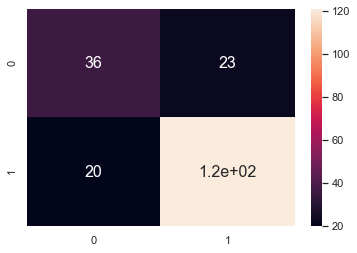

In [345]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [346]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

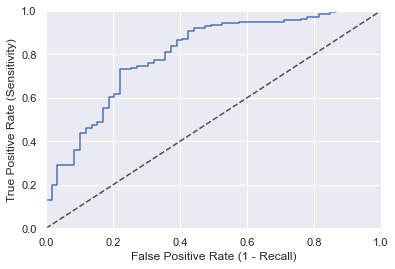



Area Under Curve: 0.80




In [347]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [314]:
export = X_test.copy()
export['Pred Score'] = y_pred
export['Actual'] = y_test
export.to_csv('prediction_export.csv')

In [315]:
import shap
explainer = shap.Explainer(model=model)
shap_values = explainer(X_test)

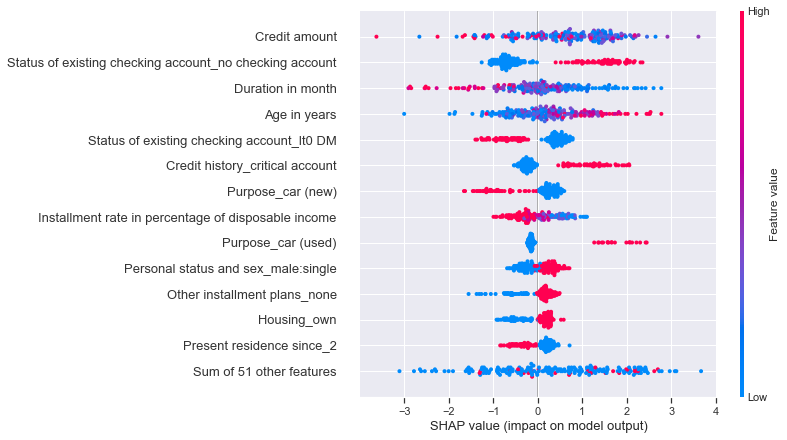

In [316]:
shap.plots.beeswarm(shap_values, max_display=14)

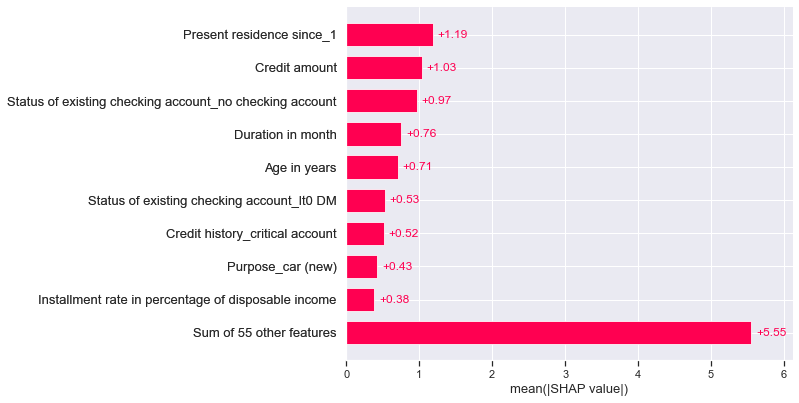

In [317]:
shap.plots.bar(shap_values)

## Feature Selection

In [274]:
model = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5)

In [275]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=model)
selector.fit(X_train, y_train,sample_weight=compute_sample_weight("balanced", y))

SelectFromModel(estimator=XGBClassifier(max_depth=5, n_estimators=1000))

In [276]:
selected_columns = list(X_train.columns[selector.get_support()])

In [277]:
selected_columns

['Status of existing checking account_lt0 DM',
 'Status of existing checking account_gt= 200 DM ',
 'Status of existing checking account_no checking account',
 'Credit history_all credits at this bank paid back duly',
 'Credit history_critical account',
 'Credit history_delay in paying off',
 'Credit history_no credits taken',
 'Purpose_business',
 'Purpose_car (new)',
 'Purpose_education',
 'Purpose_repairs',
 'Savings account/bonds_100 lt= lt500 DM',
 'Savings account/bonds_gt= 1000 DM',
 'Personal status and sex_male:divorced/separated',
 'Other debtors / guarantors_guarantor',
 'Other debtors / guarantors_none',
 'Property_unknown / no property',
 'Other installment plans_none',
 'Other installment plans_store',
 'Housing_own']

In [278]:
X_train_sel = X_train[selected_columns]
X_test_sel = X_test[selected_columns]

In [279]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5)
model.fit(X_train_sel, y_train, sample_weight=compute_sample_weight("balanced", y))

XGBClassifier(max_depth=5, n_estimators=1000)

In [281]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict_proba(X_test_sel)[:,1]
roc_auc_score(y_test, y_pred)

0.7259887005649719

In [283]:
y_class_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
f1_score(y_test, y_class_pred)

0.808362369337979

In [ ]:
#Calculating results for various evaluation metric
y_class_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
precision = precision_score(y_test,y_class_pred, average='micro')
recall = recall_score(y_test,y_class_pred, average='micro')
accuracy = accuracy_score(y_test,y_class_pred)
f1 = f1_score(y_test,y_class_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# PCA

In [318]:
from sklearn.decomposition import PCA

In [323]:
pca = PCA(n_components=60)
pca.fit(X)

PCA(n_components=60)

In [324]:
explained_variances = pca.explained_variance_ratio_

In [325]:
explained_variances.cumsum()

array([0.13365738, 0.24430615, 0.32859867, 0.40162482, 0.46832125,
       0.50680031, 0.54259397, 0.57437184, 0.6003495 , 0.62537046,
       0.64932073, 0.67152746, 0.69282986, 0.71357336, 0.73296575,
       0.75111262, 0.76820217, 0.78493407, 0.80087   , 0.81580164,
       0.8305586 , 0.84408242, 0.85689817, 0.86854736, 0.87958165,
       0.88972493, 0.89894033, 0.90776246, 0.91632057, 0.92464932,
       0.93249233, 0.94016545, 0.94630884, 0.95192899, 0.95717887,
       0.96202763, 0.96660813, 0.97082684, 0.97489949, 0.97879694,
       0.98252059, 0.98615109, 0.98923159, 0.9919713 , 0.99433037,
       0.99611914, 0.9975378 , 0.99856077, 0.99934661, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

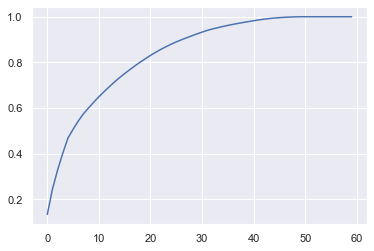

In [326]:
plt.plot(explained_variances.cumsum())

In [327]:
n_components = 30

In [328]:
pca = PCA(n_components)
pca.fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [329]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5)
model.fit(X_train_pca, y_train)

XGBClassifier(max_depth=5, n_estimators=1000)

In [330]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, y_pred)

0.7494891212886163

In [332]:
#Calculating results for various evaluation metric
y_class_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
precision = precision_score(y_test,y_class_pred, average='micro')
recall = recall_score(y_test,y_class_pred, average='micro')
accuracy = accuracy_score(y_test,y_class_pred)
f1 = f1_score(y_test,y_class_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.725
Recall: 0.725
Precision: 0.725
F1-score: 0.8109965635738831


## Visualization of Results

In [335]:
cm = confusion_matrix(y_test, y_class_pred)

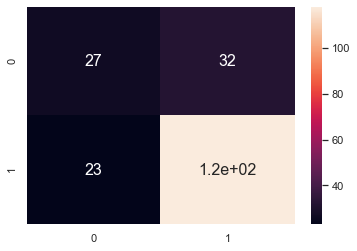

In [336]:
#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [337]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

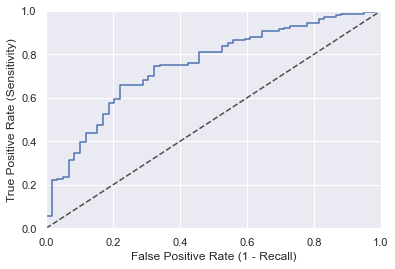



Area Under Curve: 0.75




In [338]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")